# Metropolis-Hastings - II. Sampling a 2D distribution with global and local proposals

In this notebook we consider the sampling of a 2-D probability density using the Metropolis-Hastings algorithm, either with global or with local proposals.

# 0. Import packages and set some parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 30})

# 1. Probability density

We first define the probability density that we wish to sample. This can of course be adapted to make the problem simpler or more complicated.

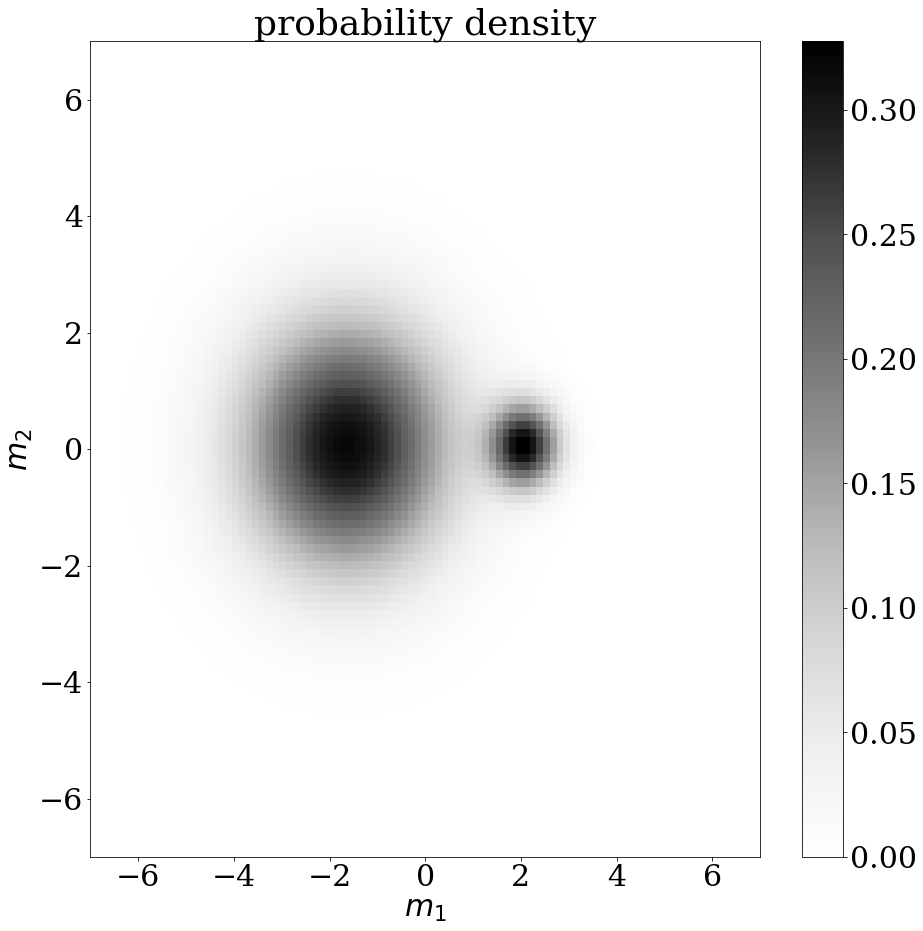

In [12]:
# Define probability density (not normalised).
def p(x,y):
    
    s1=1.5
    s2=0.5
    return np.exp(-0.5*((x+1.7)**2+y**2)/s1**2)/(2.0*np.pi*s2)+np.exp(-0.5*((x-2.0)**2+y**2)/s2**2)/(2.0*np.pi*s2)

# Plot.
x=np.linspace(-7.0,7.0,100)
y=np.linspace(-7.0,7.0,100)
x,y=np.meshgrid(x,y)

plt.figure(figsize=(15,15))
plt.pcolor(x,y,p(x,y),cmap='Greys')
plt.colorbar()
plt.xlabel(r'$m_1$')
plt.ylabel(r'$m_2$')
plt.title('probability density')
plt.show()

# 2. Input parameters

Here we set the most important input parameters. They include a flag for local or global proposals, the proposal radius (only relevant for local proposals), and the total number of samples.

In [31]:
# Make'global' or 'local' proposals.
proposal='local'

# Proposal radius. Only relevant for local proposals.
sigma=1.0

# Number of Metropolis-Hastings samples.
N=10

# Number of samples for plotting.
N_plot=10

# 3. Sampling

Sampling starts by the generation of a random starting point and the evaluation of the probability for that point. We then randomly produce new samples - either by local or global proposals - and subject them to the Metropolis rule. The result is a vector containing all the samples.

In [35]:
# Initialise sample vectors and number of accepted models.
sx=np.zeros(N)
sy=np.zeros(N)
accept=0

# Initial values (randomly or deterministically chosen).
#sx[0],sy[0]=5.0*(np.random.rand(2)-0.5)
sx[0]=-5.0
sy[0]=5.0

# Evaluate initial probability density.
p_current=p(sx[0],sy[0])

for it in range(1,N):
    
    # Make a new proposal.
    if proposal=='global':
        sx_prop,sy_prop=10.0*(np.random.rand(2)-0.5)
    elif proposal=='local':
        sx_prop=sx[it-1]+sigma*np.random.randn()
        sy_prop=sy[it-1]+sigma*np.random.randn()
            
    # Evaluate probability of the proposal.
    p_prop=p(sx_prop,sy_prop)
    
    # Compute Metropolis ratio.
    m=p_prop/p_current
    
    # Evaluate Metropolis rule
    if m>np.random.rand():
        sx[it]=sx_prop
        sy[it]=sy_prop
        p_current=p_prop
        accept+=1
    else:
        sx[it]=sx[it-1]
        sy[it]=sy[it-1]

# 4. Output and analysis

Following the sampling, we plot the results and perform some analyses.

acceptance ratio: 0.700000 


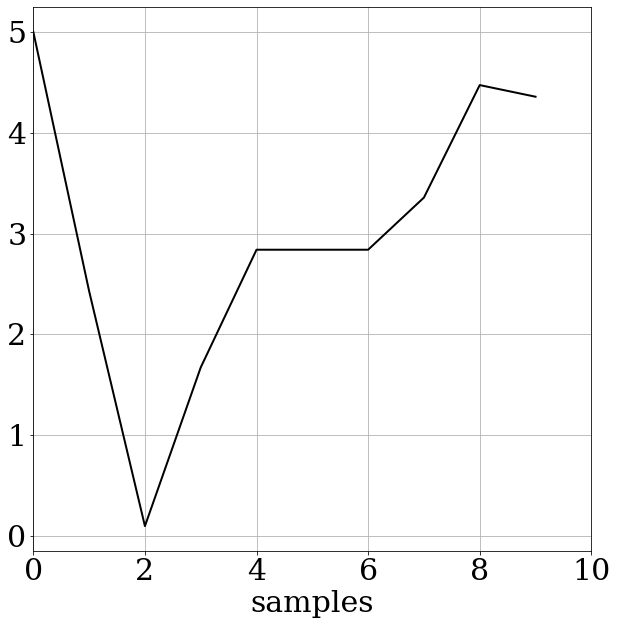

effective sample size: 1.755940


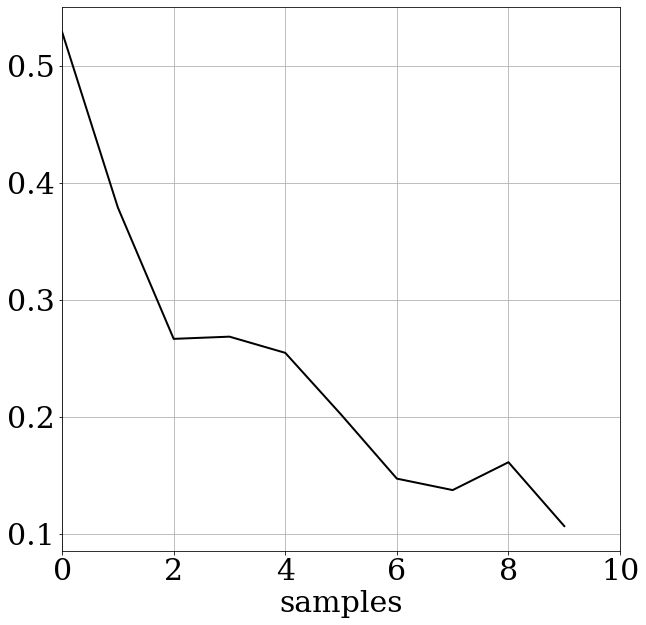

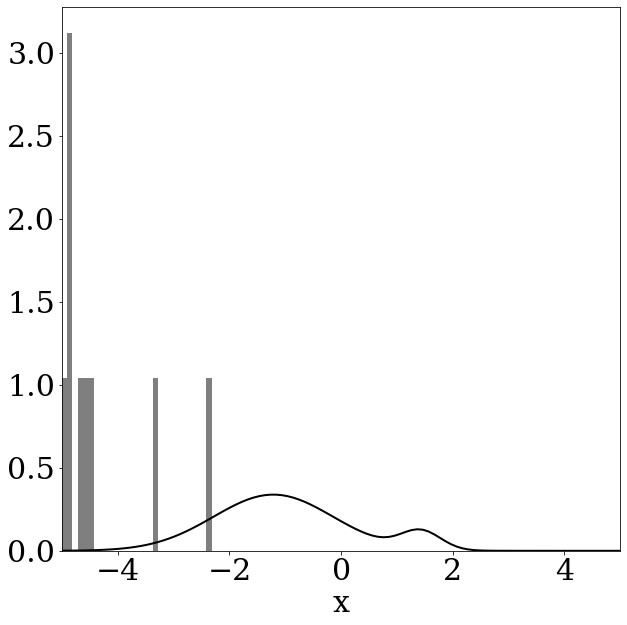

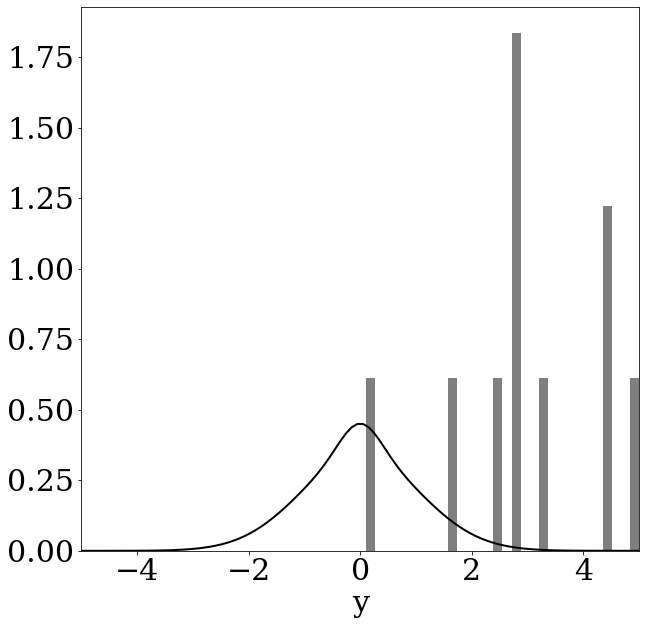

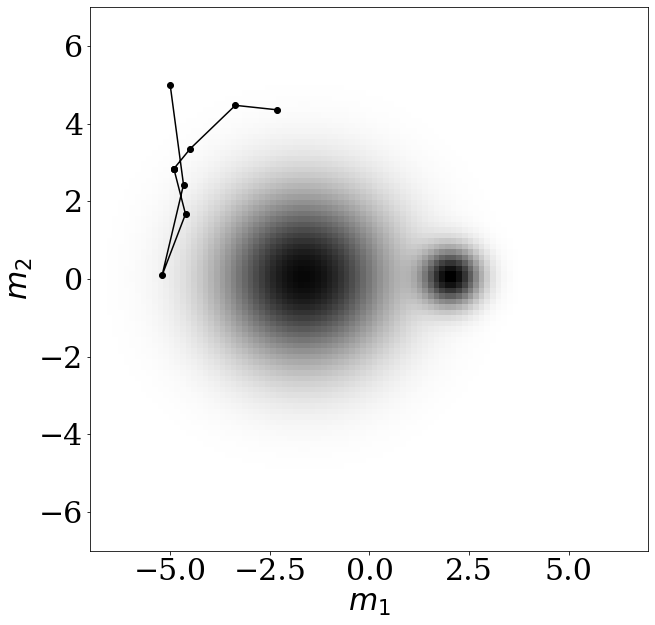

In [36]:
# Acceptance ratio.
print('acceptance ratio: %f ' % (accept/N))

# Trace plots.
plt.figure(figsize=(10,10))
plt.plot(sy,'k',linewidth=2)
plt.xlim([0,N])
plt.grid()
plt.xlabel('samples')
plt.savefig('trace.pdf')
plt.show()

# Auto-correlation.
cc=np.correlate(sy,sy,'full')/np.sum(sy*sy)
cc=cc[N-1:]

# Estimate of the effective sample size (Gelman et al., 2013).
Neff=0.0
for i in range(N-1):
    if (cc[i]+cc[i+1]>0.0):
        Neff+=cc[i]
        
Neff=N/(1.0+2.0*Neff)
print('effective sample size: %f' % Neff)

# Plot autocorrelation function.
plt.figure(figsize=(10,10))
plt.plot(cc[0:N_plot],'k',linewidth=2)
plt.xlabel('samples')
plt.xlim([0,N_plot])
plt.grid()
plt.savefig('autocorrelation.pdf')
plt.show()

# 1D marginals.
P=p(x,y)

px=0.1*np.sum(P,axis=0)
px=10.0*px/np.sum(px)

py=0.1*np.sum(P,axis=1)
py=10.0*py/np.sum(py)

plt.figure(figsize=(10,10))
n, bins, patches = plt.hist(sx, 30, density=True, facecolor='k', alpha=0.5)
plt.plot(np.linspace(-5.0,5.0,100),px,'k',linewidth=2)
plt.xlabel('x')
#plt.title('x marginal')
plt.xlim([-5.0,5.0])
plt.savefig('x_marginal.pdf')
plt.show()

plt.figure(figsize=(10,10))
n, bins, patches = plt.hist(sy, 30, density=True, facecolor='k', alpha=0.5)
plt.plot(np.linspace(-5.0,5.0,100),py,'k',linewidth=2)
plt.xlabel('y')
#plt.title('y marginal')
plt.xlim([-5.0,5.0])
plt.savefig('y_marginal.pdf')
plt.show()

# Plot samples.
if True:
    plt.figure(figsize=(10,10))
    plt.pcolor(x,y,p(x,y),cmap='binary')
    #plt.colorbar()
    plt.xlabel(r'$m_1$')
    plt.ylabel(r'$m_2$')
    plt.plot(sx[0:N_plot],sy[0:N_plot],'k')
    plt.plot(sx[0:N_plot],sy[0:N_plot],'ko')
    plt.xlim([-7.0,7.0])
    plt.ylim([-7.0,7.0])
    plt.savefig('trajectories.pdf')
    #plt.title('trajectory')
    plt.show()

